# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.082654e+01     7.752410e+00
 * time: 0.002174854278564453
     1     2.951274e+01     4.984120e+00
 * time: 0.008790969848632812
     2     1.934288e+01     3.783960e+00
 * time: 0.016922950744628906
     3     1.401954e+01     2.717292e+00
 * time: 0.02205491065979004
     4     1.210153e+01     3.263920e+00
 * time: 0.026332855224609375
     5     1.201848e+01     3.198180e+00
 * time: 0.030432939529418945
     6     1.068490e+01     1.958902e+00
 * time: 0.03466677665710449
     7     9.362334e+00     1.716498e+00
 * time: 0.03901100158691406
     8     8.846687e+00     1.069225e+00
 * time: 0.043379783630371094
     9     8.647044e+00     7.715164e-01
 * time: 0.047276973724365234
    10     8.544035e+00     8.021289e-01
 * time: 0.05108380317687988
    11     8.458102e+00     9.189114e-01
 * time: 0.054849863052368164
    12     8.392151e+00     5.097973e-01
 * time: 0.13087892532348633
    13     8.374517e+00     7.536240e-01


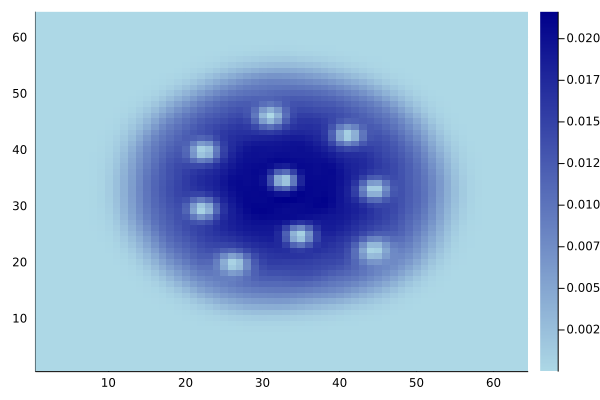

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)